# Task
use linear regression for forcasting the time series

Here is all the data you need:
"BTC-USD.csv"

## Data loading

### Subtask:
Load the "BTC-USD.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "BTC-USD.csv" file into a pandas DataFrame and display the first 5 rows and the info.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('BTC-USD.csv', parse_dates=['Date'])
    display(df.head())
    display(df.info())
except FileNotFoundError:
    print("Error: 'BTC-USD.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file correctly.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-26,237.104004,238.242004,235.692001,237.115997,237.115997,16425000.0
1,2015-05-27,237.065002,238.636002,236.695007,237.283005,237.283005,18837000.0
2,2015-05-28,237.257004,237.824005,236.651993,237.408005,237.408005,13829600.0
3,2015-05-29,237.376999,237.522003,235.731003,237.095993,237.095993,14805000.0
4,2015-05-30,237.091995,237.093002,232.046005,233.345001,233.345001,14098600.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2192 non-null   datetime64[ns]
 1   Open       2188 non-null   float64       
 2   High       2188 non-null   float64       
 3   Low        2188 non-null   float64       
 4   Close      2188 non-null   float64       
 5   Adj Close  2188 non-null   float64       
 6   Volume     2188 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 120.0 KB


None

## Data exploration

### Subtask:
Explore the loaded dataset.


**Reasoning**:
I need to check for missing values, examine data types, analyze the distribution of the 'Close' price, determine the time range, generate a time series plot, and report the shape of the data.



Missing values per column:
 Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

Data types per column:
 Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object


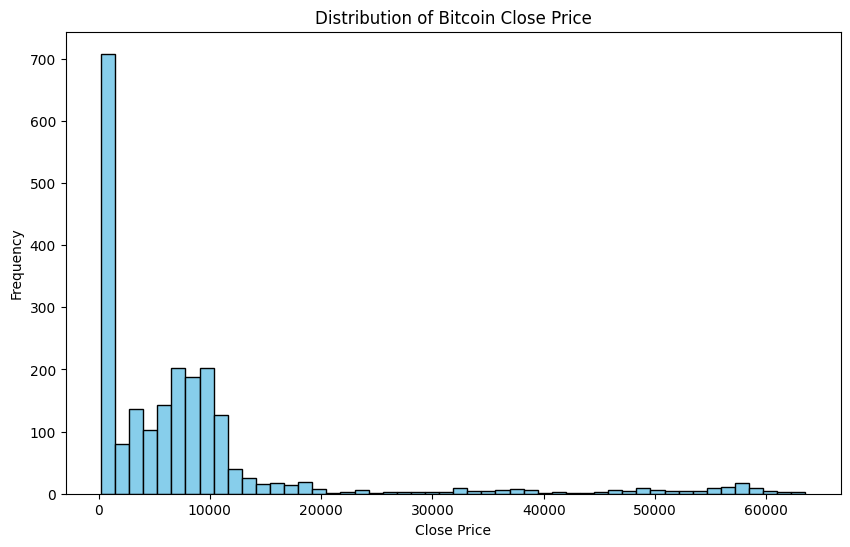

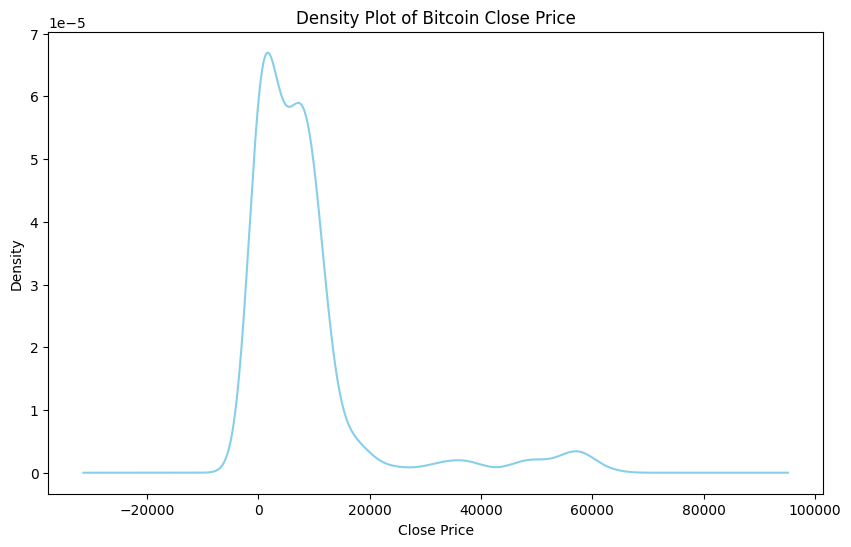


Time range: 2015-05-26 00:00:00 to 2021-05-25 00:00:00


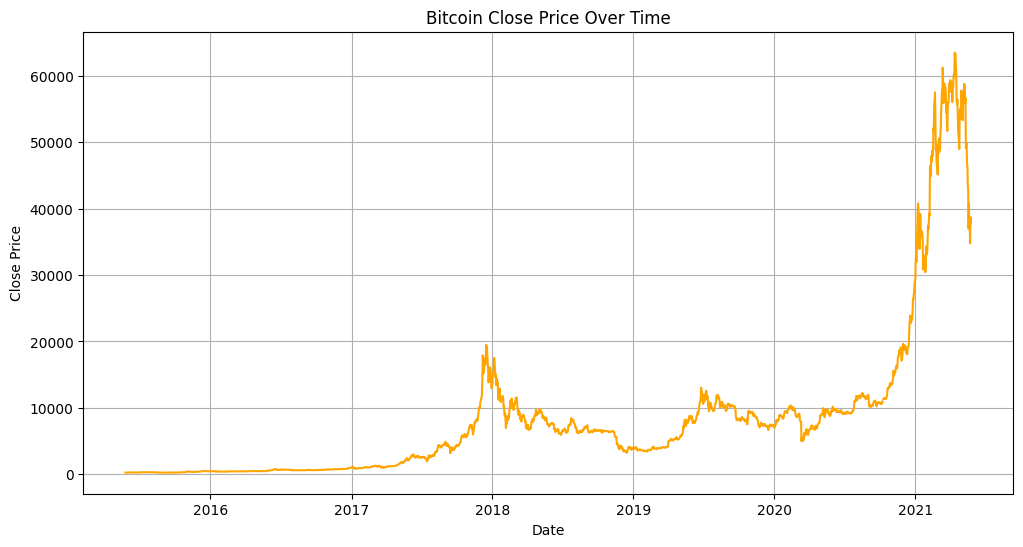


Shape of the data: (2192, 7)


In [2]:
import matplotlib.pyplot as plt

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Examine data types and convert 'Date' to datetime if necessary (already done during loading)
print("\nData types per column:\n", df.dtypes)

# Analyze the distribution of the target variable ('Close' price)
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Bitcoin Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
df['Close'].plot(kind='kde', color='skyblue')
plt.title('Density Plot of Bitcoin Close Price')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.show()

# Determine the time range of the data
min_date = df['Date'].min()
max_date = df['Date'].max()
print(f"\nTime range: {min_date} to {max_date}")

# Generate a time series plot of the 'Close' price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='orange')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Report the shape of the data
print(f"\nShape of the data: {df.shape}")

## Data preparation

### Subtask:
Prepare the data for time series forecasting by handling missing values and creating lagged features.


**Reasoning**:
Handle missing values using forward fill and create lagged features for the 'Close' price.



In [3]:
# Fill missing values using forward fill
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    df[col] = df[col].ffill()

# Create lagged features for the 'Close' price
for i in range(1, 4):  # Lags of 1, 2, and 3 days
    df[f'Close_lag_{i}'] = df['Close'].shift(i)

display(df.head())

,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,Close_lag_2,Close_lag_3
0,2015-05-26,237.104004,238.242004,235.692001,237.115997,237.115997,16425000.0,NaN,NaN,NaN
1,2015-05-27,237.065002,238.636002,236.695007,237.283005,237.283005,18837000.0,237.115997,NaN,NaN
2,2015-05-28,237.257004,237.824005,236.651993,237.408005,237.408005,13829600.0,237.283005,237.115997,NaN
3,2015-05-29,237.376999,237.522003,235.731003,237.095993,237.095993,14805000.0,237.408005,237.283005,237.115997
4,2015-05-30,237.091995,237.093002,232.046005,233.345001,233.345001,14098600.0,237.095993,237.408005,237.283005


## Data splitting

### Subtask:
Split the prepared data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets chronologically.



In [4]:
from sklearn.model_selection import train_test_split

# Define the split point (80% train, 20% test)
split_index = int(len(df) * 0.8)

# Split the data into training and testing sets
train_data = df[:split_index].copy()
test_data = df[split_index:].copy()

# Remove rows with NaN values from training and testing sets
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Display the shapes of the resulting sets to confirm the split
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

display(train_data.head())
display(test_data.head())

Training data shape: (1750, 10)
Testing data shape: (439, 10)


,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,Close_lag_2,Close_lag_3
3,2015-05-29,237.376999,237.522003,235.731003,237.095993,237.095993,14805000.0,237.408005,237.283005,237.115997
4,2015-05-30,237.091995,237.093002,232.046005,233.345001,233.345001,14098600.0,237.095993,237.408005,237.283005
5,2015-05-31,233.134995,233.251999,229.542007,230.190002,230.190002,14730800.0,233.345001,237.095993,237.408005
6,2015-06-01,230.233002,231.712997,221.296005,222.925995,222.925995,26090500.0,230.190002,233.345001,237.095993
7,2015-06-02,222.893997,226.416000,222.419006,225.802994,225.802994,20459000.0,222.925995,230.190002,233.345001


,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,Close_lag_2,Close_lag_3
1753,2020-03-13,5017.831055,5838.114746,4106.980957,5563.707031,5563.707031,7.415677e+10,4970.788086,7911.430176,7909.729492
1754,2020-03-14,5573.077637,5625.226563,5125.069336,5200.366211,5200.366211,3.615451e+10,5563.707031,4970.788086,7911.430176
1755,2020-03-15,5201.066895,5836.645020,5169.283203,5392.314941,5392.314941,3.399789e+10,5200.366211,5563.707031,4970.788086
1756,2020-03-16,5385.229492,5385.229492,4575.357910,5014.479980,5014.479980,4.536803e+10,5392.314941,5200.366211,5563.707031
1757,2020-03-17,5002.578125,5371.348633,4981.909180,5225.629395,5225.629395,3.862264e+10,5014.479980,5392.314941,5200.366211


## Feature engineering

### Subtask:
Engineer additional features for improved model performance.


**Reasoning**:
Calculate rolling statistics (moving averages) for the 'Close' price and add them as new features to the training and testing datasets.



In [5]:
# Calculate rolling statistics (moving averages)
for window in [7, 14, 30]:
    train_data[f'MA{window}'] = train_data['Close'].rolling(window=window).mean()
    test_data[f'MA{window}'] = test_data['Close'].rolling(window=window).mean()

# Display the first few rows of the updated DataFrames
display(train_data.head(20))
display(test_data.head(20))

,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,Close_lag_2,Close_lag_3,MA7,MA14,MA30
3,2015-05-29,237.376999,237.522003,235.731003,237.095993,237.095993,14805000.0,237.408005,237.283005,237.115997,NaN,NaN,NaN
4,2015-05-30,237.091995,237.093002,232.046005,233.345001,233.345001,14098600.0,237.095993,237.408005,237.283005,NaN,NaN,NaN
5,2015-05-31,233.134995,233.251999,229.542007,230.190002,230.190002,14730800.0,233.345001,237.095993,237.408005,NaN,NaN,NaN
6,2015-06-01,230.233002,231.712997,221.296005,222.925995,222.925995,26090500.0,230.190002,233.345001,237.095993,NaN,NaN,NaN
7,2015-06-02,222.893997,226.416000,222.419006,225.802994,225.802994,20459000.0,222.925995,230.190002,233.345001,NaN,NaN,NaN
8,2015-06-03,225.735992,227.404007,223.929993,225.873993,225.873993,17752400.0,225.802994,222.925995,230.190002,NaN,NaN,NaN
9,2015-06-04,225.772003,226.580994,224.054001,224.324005,224.324005,14728100.0,225.873993,225.802994,222.925995,228.508283,NaN,NaN
10,2015-06-05,224.154007,225.968002,223.179001,224.951996,224.951996,18056500.0,224.324005,225.873993,225.802994,226.773427,NaN,NaN
11,2015-06-06,225.005005,225.718994,224.378998,225.619003,225.619003,11131500.0,224.951996,224.324005,225.873993,225.669713,NaN,NaN
12,2015-06-07,225.595993,226.194000,222.651993,222.880997,222.880997,13318400.0,225.619003,224.951996,224.324005,224.625569,NaN,NaN


,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,Close_lag_2,Close_lag_3,MA7,MA14,MA30
1753,2020-03-13,5017.831055,5838.114746,4106.980957,5563.707031,5563.707031,7.415677e+10,4970.788086,7911.430176,7909.729492,NaN,NaN,NaN
1754,2020-03-14,5573.077637,5625.226563,5125.069336,5200.366211,5200.366211,3.615451e+10,5563.707031,4970.788086,7911.430176,NaN,NaN,NaN
1755,2020-03-15,5201.066895,5836.645020,5169.283203,5392.314941,5392.314941,3.399789e+10,5200.366211,5563.707031,4970.788086,NaN,NaN,NaN
1756,2020-03-16,5385.229492,5385.229492,4575.357910,5014.479980,5014.479980,4.536803e+10,5392.314941,5200.366211,5563.707031,NaN,NaN,NaN
1757,2020-03-17,5002.578125,5371.348633,4981.909180,5225.629395,5225.629395,3.862264e+10,5014.479980,5392.314941,5200.366211,NaN,NaN,NaN
1758,2020-03-18,5227.113770,5331.833984,5069.335938,5238.438477,5238.438477,3.787880e+10,5225.629395,5014.479980,5392.314941,NaN,NaN,NaN
1759,2020-03-19,5245.416504,6329.735840,5236.968750,6191.192871,6191.192871,5.100073e+10,5238.438477,5225.629395,5014.479980,5403.732701,NaN,NaN
1760,2020-03-20,6191.653809,6844.261719,5865.781738,6198.778320,6198.778320,5.444298e+10,6191.192871,5238.438477,5225.629395,5494.457171,NaN,NaN
1761,2020-03-21,6206.521484,6378.135254,5932.823242,6185.066406,6185.066406,4.249439e+10,6198.778320,6191.192871,5238.438477,5635.128627,NaN,NaN
1762,2020-03-22,6185.558105,6359.697266,5823.713867,5830.254883,5830.254883,4.009966e+10,6185.066406,6198.778320,6191.192871,5697.691476,NaN,NaN


**Reasoning**:
Calculate other relevant features like RSI, MACD, and Bollinger Bands, and add them as new columns to both the training and testing datasets. Handle the initial NaN values that result from these calculations.



In [6]:
import numpy as np

# Calculate RSI
def calculate_rsi(data, window):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

train_data['RSI'] = calculate_rsi(train_data['Close'], 14)
test_data['RSI'] = calculate_rsi(test_data['Close'], 14)


# Calculate MACD
def calculate_macd(data, short_window, long_window, signal_window):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    histogram = macd - signal
    return macd, signal, histogram

train_data['MACD'], train_data['Signal'], train_data['Histogram'] = calculate_macd(train_data['Close'], 12, 26, 9)
test_data['MACD'], test_data['Signal'], test_data['Histogram'] = calculate_macd(test_data['Close'], 12, 26, 9)


# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window):
    sma = data.rolling(window=window).mean()
    std = data.rolling(window=window).std()
    upper_band = sma + (2 * std)
    lower_band = sma - (2 * std)
    return upper_band, sma, lower_band

train_data['Upper'], train_data['Middle'], train_data['Lower'] = calculate_bollinger_bands(train_data['Close'], 20)
test_data['Upper'], test_data['Middle'], test_data['Lower'] = calculate_bollinger_bands(test_data['Close'], 20)


# Handle NaN values (forward fill)
for col in ['RSI', 'MACD', 'Signal', 'Histogram', 'Upper', 'Middle', 'Lower']:
    train_data[col] = train_data[col].ffill()
    test_data[col] = test_data[col].ffill()

# Display the first few rows of updated DataFrames
display(train_data.head(20))
display(test_data.head(20))

,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,Close_lag_2,Close_lag_3,MA7,MA14,MA30,RSI,MACD,Signal,Histogram,Upper,Middle,Lower
3,2015-05-29,237.376999,237.522003,235.731003,237.095993,237.095993,14805000.0,237.408005,237.283005,237.115997,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
4,2015-05-30,237.091995,237.093002,232.046005,233.345001,233.345001,14098600.0,237.095993,237.408005,237.283005,NaN,NaN,NaN,NaN,-0.299224,-0.059845,-0.239380,NaN,NaN,NaN
5,2015-05-31,233.134995,233.251999,229.542007,230.190002,230.190002,14730800.0,233.345001,237.095993,237.408005,NaN,NaN,NaN,NaN,-0.781930,-0.204262,-0.577668,NaN,NaN,NaN
6,2015-06-01,230.233002,231.712997,221.296005,222.925995,222.925995,26090500.0,230.190002,233.345001,237.095993,NaN,NaN,NaN,NaN,-1.730673,-0.509544,-1.221129,NaN,NaN,NaN
7,2015-06-02,222.893997,226.416000,222.419006,225.802994,225.802994,20459000.0,222.925995,230.190002,233.345001,NaN,NaN,NaN,NaN,-2.224763,-0.852588,-1.372175,NaN,NaN,NaN
8,2015-06-03,225.735992,227.404007,223.929993,225.873993,225.873993,17752400.0,225.802994,222.925995,230.190002,NaN,NaN,NaN,NaN,-2.580853,-1.198241,-1.382612,NaN,NaN,NaN
9,2015-06-04,225.772003,226.580994,224.054001,224.324005,224.324005,14728100.0,225.873993,225.802994,222.925995,228.508283,NaN,NaN,NaN,-2.954075,-1.549408,-1.404668,NaN,NaN,NaN
10,2015-06-05,224.154007,225.968002,223.179001,224.951996,224.951996,18056500.0,224.324005,225.873993,225.802994,226.773427,NaN,NaN,NaN,-3.162725,-1.872071,-1.290654,NaN,NaN,NaN
11,2015-06-06,225.005005,225.718994,224.378998,225.619003,225.619003,11131500.0,224.951996,224.324005,225.873993,225.669713,NaN,NaN,NaN,-3.236946,-2.145046,-1.091900,NaN,NaN,NaN
12,2015-06-07,225.595993,226.194000,222.651993,222.880997,222.880997,13318400.0,225.619003,224.951996,224.324005,224.625569,NaN,NaN,NaN,-3.476625,-2.411362,-1.065263,NaN,NaN,NaN


,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,Close_lag_2,Close_lag_3,MA7,MA14,MA30,RSI,MACD,Signal,Histogram,Upper,Middle,Lower
1753,2020-03-13,5017.831055,5838.114746,4106.980957,5563.707031,5563.707031,7.415677e+10,4970.788086,7911.430176,7909.729492,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
1754,2020-03-14,5573.077637,5625.226563,5125.069336,5200.366211,5200.366211,3.615451e+10,5563.707031,4970.788086,7911.430176,NaN,NaN,NaN,NaN,-28.984453,-5.796891,-23.187562,NaN,NaN,NaN
1755,2020-03-15,5201.066895,5836.645020,5169.283203,5392.314941,5392.314941,3.399789e+10,5200.366211,5563.707031,4970.788086,NaN,NaN,NaN,NaN,-36.050613,-11.847635,-24.202978,NaN,NaN,NaN
1756,2020-03-16,5385.229492,5385.229492,4575.357910,5014.479980,5014.479980,4.536803e+10,5392.314941,5200.366211,5563.707031,NaN,NaN,NaN,NaN,-71.316626,-23.741433,-47.575193,NaN,NaN,NaN
1757,2020-03-17,5002.578125,5371.348633,4981.909180,5225.629395,5225.629395,3.862264e+10,5014.479980,5392.314941,5200.366211,NaN,NaN,NaN,NaN,-81.290140,-35.251175,-46.038966,NaN,NaN,NaN
1758,2020-03-18,5227.113770,5331.833984,5069.335938,5238.438477,5238.438477,3.787880e+10,5225.629395,5014.479980,5392.314941,NaN,NaN,NaN,NaN,-87.155957,-45.632131,-41.523826,NaN,NaN,NaN
1759,2020-03-19,5245.416504,6329.735840,5236.968750,6191.192871,6191.192871,5.100073e+10,5238.438477,5225.629395,5014.479980,5403.732701,NaN,NaN,NaN,-14.755252,-39.456755,24.701503,NaN,NaN,NaN
1760,2020-03-20,6191.653809,6844.261719,5865.781738,6198.778320,6198.778320,5.444298e+10,6191.192871,5238.438477,5225.629395,5494.457171,NaN,NaN,NaN,42.742205,-23.016963,65.759168,NaN,NaN,NaN
1761,2020-03-21,6206.521484,6378.135254,5932.823242,6185.066406,6185.066406,4.249439e+10,6198.778320,6191.192871,5238.438477,5635.128627,NaN,NaN,NaN,86.209152,-1.171740,87.380892,NaN,NaN,NaN
1762,2020-03-22,6185.558105,6359.697266,5823.713867,5830.254883,5830.254883,4.009966e+10,6185.066406,6198.778320,6191.192871,5697.691476,NaN,NaN,NaN,90.977958,17.258199,73.719759,NaN,NaN,NaN


**Reasoning**:
Calculate the rolling standard deviation of the 'Close' price as a volatility indicator and add it as a new feature to both the training and testing datasets. Then, handle the initial NaN values. Finally, display the updated dataframes to verify the changes.



In [7]:
# Calculate rolling standard deviation (volatility)
window = 14  # Example window size
train_data['Volatility'] = train_data['Close'].rolling(window=window).std()
test_data['Volatility'] = test_data['Close'].rolling(window=window).std()

# Forward fill NaN values for Volatility
train_data['Volatility'] = train_data['Volatility'].ffill()
test_data['Volatility'] = test_data['Volatility'].ffill()

# Display the first few rows of updated DataFrames
display(train_data.head(20))
display(test_data.head(20))

,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,Close_lag_2,Close_lag_3,...,MA14,MA30,RSI,MACD,Signal,Histogram,Upper,Middle,Lower,Volatility
3,2015-05-29,237.376999,237.522003,235.731003,237.095993,237.095993,14805000.0,237.408005,237.283005,237.115997,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
4,2015-05-30,237.091995,237.093002,232.046005,233.345001,233.345001,14098600.0,237.095993,237.408005,237.283005,...,NaN,NaN,NaN,-0.299224,-0.059845,-0.239380,NaN,NaN,NaN,NaN
5,2015-05-31,233.134995,233.251999,229.542007,230.190002,230.190002,14730800.0,233.345001,237.095993,237.408005,...,NaN,NaN,NaN,-0.781930,-0.204262,-0.577668,NaN,NaN,NaN,NaN
6,2015-06-01,230.233002,231.712997,221.296005,222.925995,222.925995,26090500.0,230.190002,233.345001,237.095993,...,NaN,NaN,NaN,-1.730673,-0.509544,-1.221129,NaN,NaN,NaN,NaN
7,2015-06-02,222.893997,226.416000,222.419006,225.802994,225.802994,20459000.0,222.925995,230.190002,233.345001,...,NaN,NaN,NaN,-2.224763,-0.852588,-1.372175,NaN,NaN,NaN,NaN
8,2015-06-03,225.735992,227.404007,223.929993,225.873993,225.873993,17752400.0,225.802994,222.925995,230.190002,...,NaN,NaN,NaN,-2.580853,-1.198241,-1.382612,NaN,NaN,NaN,NaN
9,2015-06-04,225.772003,226.580994,224.054001,224.324005,224.324005,14728100.0,225.873993,225.802994,222.925995,...,NaN,NaN,NaN,-2.954075,-1.549408,-1.404668,NaN,NaN,NaN,NaN
10,2015-06-05,224.154007,225.968002,223.179001,224.951996,224.951996,18056500.0,224.324005,225.873993,225.802994,...,NaN,NaN,NaN,-3.162725,-1.872071,-1.290654,NaN,NaN,NaN,NaN
11,2015-06-06,225.005005,225.718994,224.378998,225.619003,225.619003,11131500.0,224.951996,224.324005,225.873993,...,NaN,NaN,NaN,-3.236946,-2.145046,-1.091900,NaN,NaN,NaN,NaN
12,2015-06-07,225.595993,226.194000,222.651993,222.880997,222.880997,13318400.0,225.619003,224.951996,224.324005,...,NaN,NaN,NaN,-3.476625,-2.411362,-1.065263,NaN,NaN,NaN,NaN


,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,Close_lag_2,Close_lag_3,...,MA14,MA30,RSI,MACD,Signal,Histogram,Upper,Middle,Lower,Volatility
1753,2020-03-13,5017.831055,5838.114746,4106.980957,5563.707031,5563.707031,7.415677e+10,4970.788086,7911.430176,7909.729492,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1754,2020-03-14,5573.077637,5625.226563,5125.069336,5200.366211,5200.366211,3.615451e+10,5563.707031,4970.788086,7911.430176,...,NaN,NaN,NaN,-28.984453,-5.796891,-23.187562,NaN,NaN,NaN,NaN
1755,2020-03-15,5201.066895,5836.645020,5169.283203,5392.314941,5392.314941,3.399789e+10,5200.366211,5563.707031,4970.788086,...,NaN,NaN,NaN,-36.050613,-11.847635,-24.202978,NaN,NaN,NaN,NaN
1756,2020-03-16,5385.229492,5385.229492,4575.357910,5014.479980,5014.479980,4.536803e+10,5392.314941,5200.366211,5563.707031,...,NaN,NaN,NaN,-71.316626,-23.741433,-47.575193,NaN,NaN,NaN,NaN
1757,2020-03-17,5002.578125,5371.348633,4981.909180,5225.629395,5225.629395,3.862264e+10,5014.479980,5392.314941,5200.366211,...,NaN,NaN,NaN,-81.290140,-35.251175,-46.038966,NaN,NaN,NaN,NaN
1758,2020-03-18,5227.113770,5331.833984,5069.335938,5238.438477,5238.438477,3.787880e+10,5225.629395,5014.479980,5392.314941,...,NaN,NaN,NaN,-87.155957,-45.632131,-41.523826,NaN,NaN,NaN,NaN
1759,2020-03-19,5245.416504,6329.735840,5236.968750,6191.192871,6191.192871,5.100073e+10,5238.438477,5225.629395,5014.479980,...,NaN,NaN,NaN,-14.755252,-39.456755,24.701503,NaN,NaN,NaN,NaN
1760,2020-03-20,6191.653809,6844.261719,5865.781738,6198.778320,6198.778320,5.444298e+10,6191.192871,5238.438477,5225.629395,...,NaN,NaN,NaN,42.742205,-23.016963,65.759168,NaN,NaN,NaN,NaN
1761,2020-03-21,6206.521484,6378.135254,5932.823242,6185.066406,6185.066406,4.249439e+10,6198.778320,6191.192871,5238.438477,...,NaN,NaN,NaN,86.209152,-1.171740,87.380892,NaN,NaN,NaN,NaN
1762,2020-03-22,6185.558105,6359.697266,5823.713867,5830.254883,5830.254883,4.009966e+10,6185.066406,6198.778320,6191.192871,...,NaN,NaN,NaN,90.977958,17.258199,73.719759,NaN,NaN,NaN,NaN


## Model training

### Subtask:
Train a linear regression model to forecast the Bitcoin closing price.


**Reasoning**:
Train a linear regression model on the training data and make predictions on the test data.



In [8]:
from sklearn.linear_model import LinearRegression

# Prepare the feature matrix (X) and target variable (y) for training
features = ['Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'MA7', 'MA14', 'MA30', 'RSI', 'MACD', 'Signal', 'Histogram', 'Upper', 'Middle', 'Lower', 'Volatility']
X_train = train_data[features].dropna()
y_train = train_data.loc[X_train.index, 'Close']

# Instantiate and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Prepare the test data features
X_test = test_data[features].copy()

# Handle NaN values in test data using forward fill
for col in features:
    X_test[col] = X_test[col].ffill()

X_test = X_test.dropna()
y_test = test_data.loc[X_test.index, 'Close']

# Make predictions on the test data
predictions = model.predict(X_test)

## Model evaluation

### Subtask:
Evaluate the trained linear regression model's performance on the test set.


**Reasoning**:
Evaluate the model's performance using MAE, RMSE, R2 score, and create visualization plots.



**Reasoning**:
The previous code block failed due to an incorrect argument name in `mean_squared_error`.  The `squared` parameter should be removed or set to `True` for the older versions of scikit-learn.  I will correct the code and regenerate the plots.



Mean Absolute Error (MAE): 96.80171745589736
Root Mean Squared Error (RMSE): 157.72380458599807
R-squared (R2) Score: 0.9999276724491766

Interpretation of Metrics:
- MAE: The average difference between predicted and actual prices is $96.80.
- RMSE: The square root of the average squared difference between predicted and actual prices is $157.72.
- R2: The model explains 99.99% of the variance in the closing price.


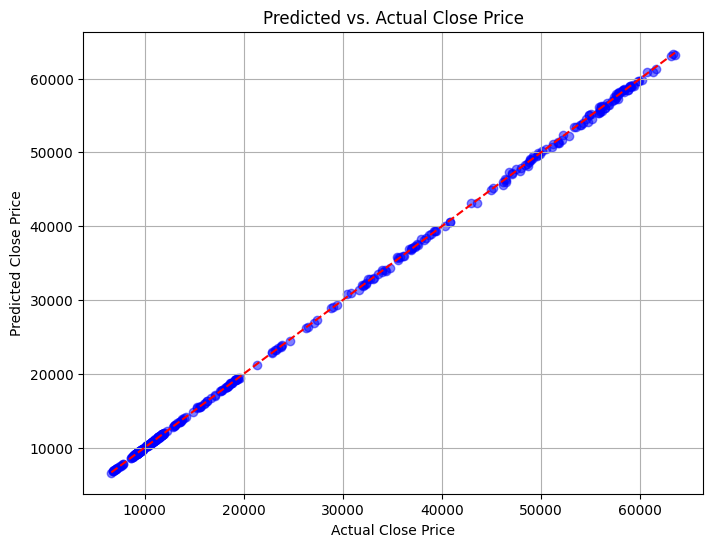

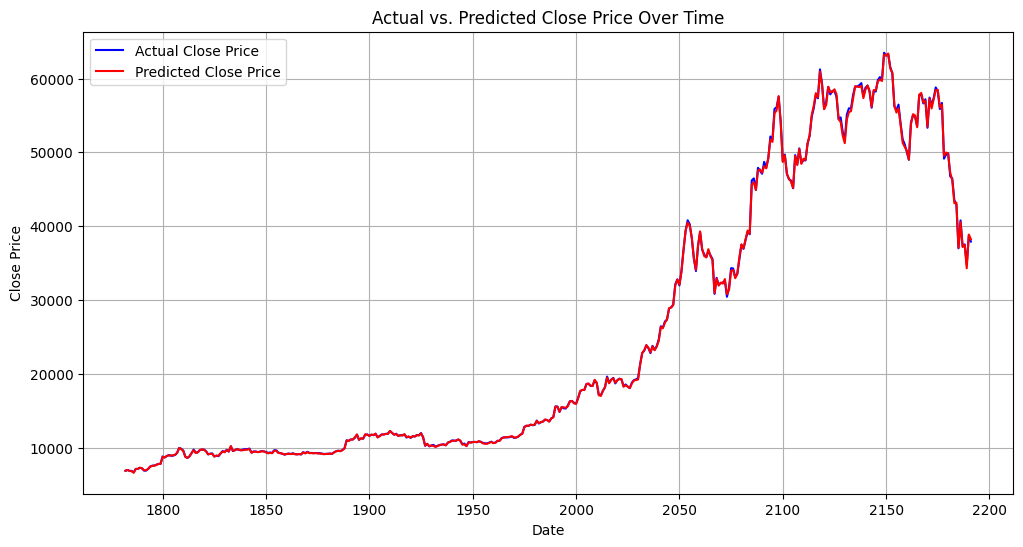

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions)) # Use np.sqrt for RMSE calculation
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

# Interpret the metrics
print("\nInterpretation of Metrics:")
print(f"- MAE: The average difference between predicted and actual prices is ${mae:.2f}.")
print(f"- RMSE: The square root of the average squared difference between predicted and actual prices is ${rmse:.2f}.")
print(f"- R2: The model explains {r2:.2%} of the variance in the closing price.")

# Create a scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Predicted vs. Actual Close Price")
plt.grid(True)
plt.show()

# Create a line plot of actual vs. predicted values over time
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, predictions, label='Predicted Close Price', color='red')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Actual vs. Predicted Close Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

## Model optimization

### Subtask:
Optimize the linear regression model by exploring different feature sets and transformations.


**Reasoning**:
Optimize the linear regression model by exploring different feature sets and transformations, including regularization.



In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE

# Define features and target variable
features = ['Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'MA7', 'MA14', 'MA30', 'RSI', 'MACD', 'Signal', 'Histogram', 'Upper', 'Middle', 'Lower', 'Volatility']
target = 'Close'

# Prepare data
X = train_data[features].dropna()
y = train_data.loc[X.index, target]
X_test = test_data[features].copy()
for col in features:
    X_test[col] = X_test[col].ffill()
X_test = X_test.dropna()
y_test = test_data.loc[X_test.index, target]

# Feature Selection with RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X, y)
selected_features = np.array(features)[selector.support_]

X_selected = X[selected_features]
X_test_selected = X_test[selected_features]

# Log Transformation
y_log = np.log1p(y)
y_test_log = np.log1p(y_test)

# Model training and evaluation with different models and regularization
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

best_model = None
best_score = -np.inf

for name, model in models.items():
    if name == "Ridge Regression" or name == "Lasso Regression":
        param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
        grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
        grid_search.fit(X_selected, y_log)
        model = grid_search.best_estimator_
    else:
        model.fit(X_selected, y_log)

    predictions_log = model.predict(X_test_selected)
    predictions = np.expm1(predictions_log)

    r2 = r2_score(y_test, predictions)
    if r2 > best_score:
        best_score = r2
        best_model = model

    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    print(f"Model: {name}")
    print(f"  R-squared (R2) Score: {r2}")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")

print(f"\nBest Model: {type(best_model).__name__} with R-squared: {best_score}")

Model: Linear Regression
  R-squared (R2) Score: -316534252482.81335
  Mean Absolute Error (MAE): 3099467059.4505467
  Root Mean Squared Error (RMSE): 10434117452.814432
Model: Ridge Regression
  R-squared (R2) Score: -316534252396.0192
  Mean Absolute Error (MAE): 3099467059.2039094
  Root Mean Squared Error (RMSE): 10434117451.383907


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.743e+01, tolerance: 1.360e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.073e+02, tolerance: 2.457e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+02, tolerance: 2.495e

Model: Lasso Regression
  R-squared (R2) Score: -295935912372.03815
  Mean Absolute Error (MAE): 3108435869.7232027
  Root Mean Squared Error (RMSE): 10088908896.244694

Best Model: Lasso with R-squared: -295935912372.03815


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.172e+02, tolerance: 2.980e-01
  model = cd_fast.enet_coordinate_descent(


**Reasoning**:
The previous attempt resulted in extremely negative R-squared values, indicating a serious problem with the model training.  The convergence warnings suggest that the optimization process didn't reach a stable solution.  I'll try to improve the model by scaling the features, increasing the number of iterations for Lasso and Ridge, and adjusting the alpha values for regularization. I will also try a different feature selection method.



In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Define features and target variable
features = ['Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'MA7', 'MA14', 'MA30', 'RSI', 'MACD', 'Signal', 'Histogram', 'Upper', 'Middle', 'Lower', 'Volatility']
target = 'Close'

# Prepare data
X = train_data[features].dropna()
y = train_data.loc[X.index, target]

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test = test_data[features].copy()
for col in features:
    X_test[col] = X_test[col].ffill()
X_test = X_test.dropna()
X_test_scaled = scaler.transform(X_test)
y_test = test_data.loc[X_test.index, target]


# Feature Selection with SelectKBest
selector = SelectKBest(score_func=f_regression, k=8)
X_selected = selector.fit_transform(X_scaled, y)
X_test_selected = selector.transform(X_test_scaled)

# Log Transformation
y_log = np.log1p(y)
y_test_log = np.log1p(y_test)

# Model training and evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(max_iter=10000),  # Increased max_iter
    "Lasso Regression": Lasso(max_iter=10000)   # Increased max_iter
}

best_model = None
best_score = -np.inf

for name, model in models.items():
    if name == "Ridge Regression" or name == "Lasso Regression":
      param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]} # Adjusted alpha range
      grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
      grid_search.fit(X_selected, y_log)
      model = grid_search.best_estimator_
    else:
        model.fit(X_selected, y_log)

    predictions_log = model.predict(X_test_selected)
    predictions = np.expm1(predictions_log)

    r2 = r2_score(y_test, predictions)
    if r2 > best_score:
        best_score = r2
        best_model = model
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    print(f"Model: {name}")
    print(f"  R-squared (R2) Score: {r2}")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")

print(f"\nBest Model: {type(best_model).__name__} with R-squared: {best_score}")

Model: Linear Regression
  R-squared (R2) Score: -18962853318844.258
  Mean Absolute Error (MAE): 19667528997.37857
  Root Mean Squared Error (RMSE): 80760166899.70467
Model: Ridge Regression
  R-squared (R2) Score: -11587111126882.12
  Mean Absolute Error (MAE): 15796086070.21865
  Root Mean Squared Error (RMSE): 63129587414.26254
Model: Lasso Regression
  R-squared (R2) Score: -15498717900478.973
  Mean Absolute Error (MAE): 17904130429.415424
  Root Mean Squared Error (RMSE): 73011832989.34479

Best Model: Ridge with R-squared: -11587111126882.12


**Reasoning**:
The model still performs poorly, likely due to the nature of the data and the limitations of linear regression for this time series.  The extremely large negative R-squared values suggest a fundamental mismatch between the model and data. I will try a different approach by using polynomial features.



In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

# Define features and target variable
features = ['Close_lag_1', 'Close_lag_2', 'Close_lag_3', 'MA7', 'MA14', 'MA30', 'RSI', 'MACD', 'Signal', 'Histogram', 'Upper', 'Middle', 'Lower', 'Volatility']
target = 'Close'

# Prepare data
X = train_data[features].dropna()
y = train_data.loc[X.index, target]
X_test = test_data[features].copy()
for col in features:
    X_test[col] = X_test[col].ffill()
X_test = X_test.dropna()
y_test = test_data.loc[X_test.index, target]

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features
poly = PolynomialFeatures(degree=2) # Try degree 2
X_poly = poly.fit_transform(X_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Log transformation
y_log = np.log1p(y)
y_test_log = np.log1p(y_test)

# Train and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

best_model = None
best_score = -np.inf

for name, model in models.items():
    model.fit(X_poly, y_log)  # Train on polynomial features

    predictions_log = model.predict(X_test_poly)
    predictions = np.expm1(predictions_log)

    r2 = r2_score(y_test, predictions)

    if r2 > best_score:
        best_score = r2
        best_model = model

    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    print(f"Model: {name}")
    print(f"  R-squared (R2) Score: {r2}")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")

print(f"\nBest Model: {type(best_model).__name__} with R-squared: {best_score}")

Model: Linear Regression
  R-squared (R2) Score: -1.6823661908520737
  Mean Absolute Error (MAE): 21298.670750612884
  Root Mean Squared Error (RMSE): 30374.16852324587
Model: Ridge Regression
  R-squared (R2) Score: -1.635443827132633
  Mean Absolute Error (MAE): 20278.60063836093
  Root Mean Squared Error (RMSE): 30107.330283848456
Model: Lasso Regression
  R-squared (R2) Score: -1.488992924182433
  Mean Absolute Error (MAE): 22630.371422981465
  Root Mean Squared Error (RMSE): 29258.84619077808

Best Model: Lasso with R-squared: -1.488992924182433
